### HW3: Hybrid images
In this assignment you will create a hybrid cat/dog image.

A. Oliva, A. Torralba, and P. G. Schyns.  [Hybrid Images](http://cvcl.mit.edu/publications/OlivaTorralb_Hybrid_Siggraph06.pdf).  SIGGRAPH 2006.

In [67]:
%matplotlib inline
import cv2
import numpy as np
from scipy.misc import imread
from matplotlib import pyplot as plt

### Step 1: Load the cat and dog images, convert to double precision and divide by 255.
Use imread from scipy.misc to read the images as RGB.

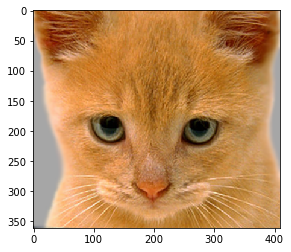

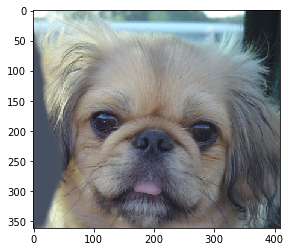

In [68]:
catImg = imread('C:/Users/Ryan/Desktop/Fall2017/5840/Projects/Assignment3/cat.bmp')
dogImg = imread('C:/Users/Ryan/Desktop/Fall2017/5840/Projects/Assignment3/dog.bmp')

catImg = catImg / 255
dogImg = dogImg / 255

plt.imshow(catImg)
plt.show()
plt.imshow(dogImg)
plt.show()


### Step 2: Make a low-pass kernel of size 31x31 with sigma=5.
See cv2.getGaussianKernel().  This will return a vector g.  To create the kernel matrix, compute g = g*g.transpose().

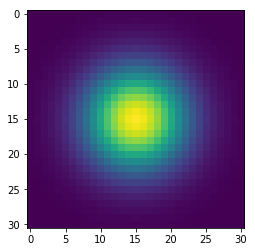

In [69]:
g = cv2.getGaussianKernel(31, 5)
g = g*g.transpose()

plt.imshow(g)
plt.show()

### Step 3: Make a high-pass kernel using the low-pass kernel you made in the last step.
See the lecture slides to understand how to create a high-pass kernel from a low-pass kernel.

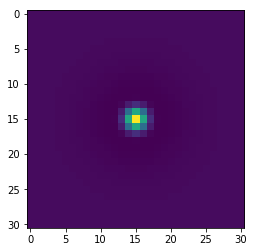

In [70]:
a = cv2.getGaussianKernel(31, 1)
a = a*a.transpose()

h = a - g

plt.imshow(h)
plt.show()

### Step 4: Filter the dog image with the low-pass kernel.  Filter the cat image with the high-pass kernel.
See cv2.filter2D().

Note that you are not allowed to low-pass the cat and then subtract the result from the original.  You should have made a high-pass kernel in the previous step so that you can produce the high-passed result in a single call to cv2.filter2D().

Note that if you clip the images to the range [0,1] using np.clip they will look better when you show them.

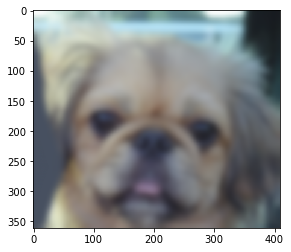

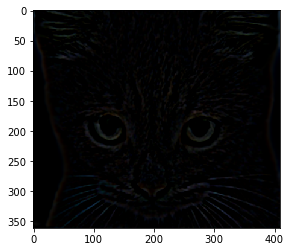

In [71]:
lowPassDog = cv2.filter2D(dogImg, -1, g)

plt.imshow(lowPassDog)
plt.show()

highPassCat = cv2.filter2D(catImg, -1, h)
plt.imshow(np.clip(highPassCat, 0, 1))
plt.show()

### Step 5: Add the low-passed dog and high-passed cat together to produce the hybrid image.

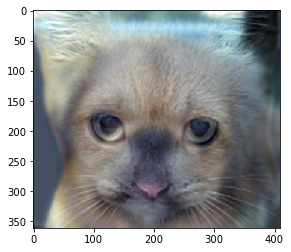

In [72]:
combined = lowPassDog + highPassCat

plt.imshow(np.clip(combined, 0, 1))
plt.show()